<a href="https://colab.research.google.com/github/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/PredireReussiteSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prédire la réussite des études

Dans cet exercice, il s'agit d'étudier un ensemble de données sur la performance d'étudiantes et d'étudiants aux hautes études en fonction du contexte local, familliale et personnel.

Le but est de créer un réseau de neurones capable de prédire la réussite d'une personne en fonction de ces données.

Le jeux de données (dataset) est issu du site [kaggle](https://www.kaggle.com/); il comporte 145 exemples, composés de 20 critères, et d'une sortie (le niveau de réussite).

Voici le fichier à télécharger : [student_prediction_td.csv](https://github.com/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/student_prediction_td.csv)

---
Les données représentant les personnes sont les suivantes : 
 - **Student Age** (1: 18-21, 2: 22-25, 3: above 26)
 - **Sex** (1: female, 2: male)
 - **Graduated high-school type:** (1: private, 2: state, 3: other)
 - **Scholarship type:** (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
 - **Additional work:** (1: Yes, 2: No)
 - **Regular artistic or sports activity:** (1: Yes, 2: No)
 - **Do you have a partner:** (1: Yes, 2: No)
 - **Transportation to the university:** (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
 - **Accommodation type in Cyprus:** (1: rental, 2: dormitory, 3: with family, 4: Other)
 - **Mother's education:** (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
 - **Father's education:** (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
 - **Number of sisters/brothers (if available):** (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
 - **Parental status:** (1: married, 2: divorced, 3: died - one of them or both)
 - **Weekly study hours:** (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
 - **Reading frequency (non-scientific books/journals):** (1: None, 2: Sometimes, 3: Often)
 - **Attendance to classes** (1: always, 2: sometimes, 3: never)
 - **Preparation to midterm exams 1:** (1: alone, 2: with friends, 3: not applicable)
 - **Preparation to midterm exams 2:** (1: closest date to the exam, 2: regularly during the semester, 3: never)
 - **Taking notes in classes:** (1: never, 2: sometimes, 3: always)
 - **Listening in classes:** (1: never, 2: sometimes, 3: always)

La sortie est codée ainsi : 
 - **OUTPUT Grade** (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

---
## Importer les librairies


In [1]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
#pour les graphiques
import matplotlib.pyplot as plt
#SI bug plus loin lors du dessin des graphiques, ajouter ces 2 lignes
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

---

### Définir les entrées et sorties attendues

Les entrées et sorties correspondent valeurs du tableau csv, normalisées sur [0,1].

Ici, les entrées d'apprentissage sont consituées de 70% des exemples. 

Les entrées et sorties de validations sont donc constitués des 30% restants


In [2]:
#transformer les données en entrées et sorties
# attention, il vaut mieux rester entre 0 & 1, surtout pour la sortie !

original = np.array([
[2, 2, 3, 3, 1, 2, 2, 1, 1, 1, 2, 3, 1, 3, 2, 1, 1, 1, 3, 2, 1], 
[2, 2, 3, 3, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 2, 1, 1, 1, 3, 2, 1], 
[2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1], 
[1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 2, 5, 1, 3, 1, 1, 1, 2, 3, 2, 1], 
[2, 2, 1, 3, 2, 2, 1, 1, 4, 3, 3, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1], 
[2, 2, 2, 3, 2, 2, 2, 1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2], 
[1, 2, 2, 4, 2, 2, 2, 1, 3, 1, 3, 1, 1, 2, 2, 2, 1, 1, 3, 3, 5], 
[1, 1, 2, 3, 1, 1, 1, 2, 3, 4, 3, 1, 1, 1, 2, 1, 3, 1, 3, 2, 2], 
[2, 1, 3, 3, 2, 1, 1, 1, 3, 2, 4, 2, 1, 1, 2, 1, 1, 1, 3, 2, 5], 
[2, 1, 2, 3, 2, 2, 1, 4, 2, 1, 2, 3, 1, 2, 2, 2, 1, 1, 2, 2, 0], 
[1, 1, 1, 3, 2, 2, 2, 2, 3, 3, 4, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2], 
[1, 1, 1, 4, 1, 1, 2, 2, 3, 5, 5, 1, 1, 3, 3, 1, 3, 2, 3, 1, 0], 
[1, 1, 1, 4, 2, 2, 2, 1, 1, 3, 5, 4, 2, 3, 2, 1, 1, 1, 2, 2, 0], 
[2, 1, 2, 5, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 1], 
[3, 2, 2, 4, 1, 1, 2, 4, 2, 3, 1, 2, 1, 2, 2, 1, 1, 1, 2, 3, 2], 
[2, 2, 2, 3, 2, 2, 2, 1, 2, 4, 4, 2, 1, 2, 2, 2, 1, 1, 3, 2, 2], 
[1, 1, 2, 5, 2, 1, 2, 1, 1, 2, 2, 4, 1, 2, 2, 2, 1, 1, 3, 2, 1], 
[2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2], 
[1, 1, 2, 4, 2, 2, 2, 1, 1, 2, 2, 5, 1, 5, 3, 2, 1, 1, 3, 1, 2], 
[1, 2, 1, 3, 2, 2, 1, 2, 2, 3, 3, 3, 1, 4, 2, 1, 1, 1, 3, 2, 3], 
[1, 2, 2, 5, 1, 2, 1, 4, 2, 3, 3, 3, 2, 4, 2, 1, 1, 2, 3, 1, 1], 
[1, 2, 2, 5, 2, 2, 1, 4, 2, 2, 2, 4, 1, 3, 2, 1, 1, 1, 3, 1, 1], 
[2, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 4, 2, 3, 3, 1, 1, 2, 3, 1, 3], 
[3, 2, 2, 2, 1, 1, 2, 1, 1, 1, 4, 3, 1, 3, 2, 2, 1, 1, 3, 2, 1], 
[2, 2, 2, 3, 2, 2, 2, 1, 1, 3, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 2], 
[2, 2, 2, 3, 2, 2, 1, 1, 2, 1, 4, 3, 1, 2, 2, 1, 1, 1, 2, 1, 3], 
[2, 2, 2, 3, 2, 1, 1, 1, 1, 4, 4, 4, 1, 2, 3, 1, 1, 1, 3, 3, 1], 
[1, 2, 1, 3, 1, 2, 2, 1, 1, 1, 1, 4, 1, 3, 2, 2, 1, 1, 3, 1, 1], 
[3, 2, 2, 3, 2, 2, 1, 4, 2, 2, 2, 4, 1, 2, 2, 1, 1, 1, 3, 2, 3], 
[2, 2, 3, 4, 2, 2, 2, 4, 2, 3, 3, 2, 1, 2, 2, 1, 1, 1, 3, 2, 5], 
[2, 2, 2, 5, 1, 1, 1, 1, 2, 1, 1, 5, 1, 2, 2, 1, 2, 1, 2, 3, 5], 
[3, 2, 2, 3, 1, 2, 2, 1, 2, 1, 2, 4, 1, 2, 2, 1, 1, 1, 3, 3, 3], 
[2, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1], 
[2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 2, 5, 1, 2, 1, 1, 1, 1, 1, 3, 2], 
[1, 2, 1, 3, 2, 2, 1, 1, 1, 3, 3, 3, 1, 2, 1, 2, 1, 1, 2, 2, 2], 
[1, 2, 1, 4, 2, 2, 2, 1, 1, 1, 2, 5, 1, 2, 2, 2, 1, 1, 2, 1, 1], 
[2, 2, 3, 4, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2], 
[2, 2, 2, 3, 1, 1, 1, 2, 3, 3, 3, 1, 1, 2, 2, 1, 1, 1, 3, 2, 1], 
[2, 2, 2, 5, 2, 2, 2, 1, 1, 3, 3, 1, 1, 3, 2, 1, 2, 1, 2, 2, 2], 
[2, 1, 2, 3, 2, 2, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1], 
[1, 2, 1, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1], 
[3, 2, 2, 3, 1, 2, 2, 1, 2, 1, 4, 2, 1, 3, 2, 2, 1, 1, 3, 2, 1], 
[2, 2, 2, 3, 2, 1, 2, 4, 2, 4, 4, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1], 
[1, 2, 2, 3, 2, 2, 1, 1, 1, 2, 3, 3, 1, 2, 2, 2, 1, 1, 3, 1, 4], 
[2, 2, 3, 3, 2, 2, 1, 1, 1, 1, 3, 2, 1, 2, 2, 1, 2, 1, 3, 2, 1], 
[1, 2, 2, 3, 2, 2, 1, 1, 1, 2, 3, 5, 1, 3, 2, 1, 1, 1, 2, 2, 3], 
[2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 2, 2, 5], 
[2, 2, 2, 3, 2, 2, 1, 1, 2, 4, 3, 1, 1, 2, 2, 2, 1, 1, 2, 1, 3], 
[1, 2, 2, 3, 2, 1, 1, 1, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 2, 1], 
[1, 2, 1, 4, 2, 2, 2, 4, 1, 2, 3, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2], 
[2, 2, 2, 3, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1], 
[2, 1, 3, 3, 1, 1, 2, 1, 1, 1, 2, 5, 1, 1, 2, 2, 1, 1, 2, 3, 4], 
[2, 1, 2, 3, 1, 2, 2, 1, 1, 1, 3, 4, 1, 3, 1, 1, 1, 2, 2, 2, 1], 
[2, 1, 2, 3, 2, 1, 2, 1, 1, 1, 1, 5, 1, 1, 2, 2, 1, 1, 2, 2, 5], 
[2, 2, 2, 3, 2, 2, 2, 4, 2, 1, 4, 2, 1, 2, 1, 1, 1, 2, 3, 1, 3], 
[3, 2, 2, 3, 1, 2, 1, 1, 2, 1, 1, 5, 3, 1, 2, 1, 3, 3, 1, 3, 3], 
[2, 2, 2, 3, 2, 1, 2, 1, 1, 1, 3, 5, 1, 4, 2, 1, 1, 2, 3, 2, 5], 
[2, 2, 2, 3, 1, 1, 2, 1, 1, 4, 2, 3, 1, 2, 3, 1, 1, 1, 3, 2, 4], 
[3, 2, 2, 3, 2, 2, 1, 1, 1, 1, 3, 5, 2, 3, 2, 1, 1, 1, 3, 2, 3], 
[2, 2, 2, 3, 2, 1, 1, 1, 1, 4, 4, 3, 1, 3, 2, 1, 1, 1, 3, 3, 5], 
[2, 1, 2, 3, 2, 2, 2, 2, 1, 6, 1, 3, 1, 1, 2, 1, 1, 1, 1, 3, 2], 
[1, 2, 3, 3, 2, 1, 2, 1, 2, 1, 3, 4, 1, 3, 1, 2, 1, 1, 3, 2, 5], 
[2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 3, 2, 1, 3, 2, 1, 1, 1, 2, 3, 3], 
[2, 2, 2, 4, 2, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 2, 2, 5], 
[2, 2, 3, 5, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 3, 2, 3], 
[1, 2, 2, 3, 2, 2, 1, 1, 1, 2, 4, 3, 1, 1, 1, 2, 2, 1, 2, 1, 2], 
[2, 2, 2, 3, 2, 2, 1, 1, 1, 3, 2, 5, 1, 2, 2, 1, 1, 1, 3, 2, 5], 
[2, 2, 3, 3, 1, 1, 2, 1, 2, 3, 4, 4, 2, 2, 2, 2, 1, 1, 2, 2, 1], 
[2, 1, 2, 4, 1, 2, 2, 1, 1, 2, 3, 5, 3, 1, 2, 2, 1, 1, 2, 2, 5], 
[2, 1, 2, 4, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 3, 2, 5], 
[1, 2, 2, 4, 2, 1, 1, 1, 1, 4, 3, 1, 2, 2, 2, 1, 1, 1, 2, 2, 7], 
[1, 1, 3, 4, 2, 2, 2, 1, 3, 1, 3, 5, 1, 2, 2, 1, 1, 1, 2, 3, 6], 
[1, 2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 3, 1, 1, 1, 2, 2, 6], 
[2, 2, 2, 4, 2, 2, 2, 1, 2, 1, 3, 4, 1, 3, 1, 1, 1, 2, 3, 2, 6], 
[1, 2, 2, 4, 2, 2, 2, 1, 1, 2, 2, 3, 1, 2, 2, 1, 2, 1, 3, 2, 7], 
[1, 2, 2, 4, 2, 1, 2, 1, 3, 1, 5, 4, 1, 3, 3, 1, 1, 1, 2, 2, 7], 
[2, 2, 1, 2, 2, 1, 2, 1, 1, 5, 4, 3, 1, 2, 3, 1, 3, 2, 2, 1, 4], 
[1, 2, 1, 2, 2, 2, 1, 2, 2, 6, 5, 2, 1, 2, 2, 2, 3, 1, 2, 2, 7], 
[2, 1, 2, 4, 1, 1, 2, 1, 1, 1, 3, 4, 1, 2, 3, 2, 1, 1, 3, 3, 4], 
[2, 2, 2, 4, 2, 2, 2, 1, 1, 1, 3, 4, 1, 1, 2, 1, 1, 1, 3, 3, 3], 
[2, 1, 2, 3, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 4], 
[3, 2, 2, 3, 1, 2, 2, 1, 2, 1, 2, 4, 1, 2, 2, 1, 1, 1, 3, 3, 3], 
[2, 2, 2, 4, 1, 2, 1, 1, 1, 3, 1, 3, 1, 2, 2, 1, 1, 1, 3, 3, 7], 
[2, 2, 3, 3, 2, 2, 2, 1, 1, 4, 4, 2, 1, 1, 2, 1, 3, 1, 3, 2, 7], 
[3, 2, 3, 3, 1, 2, 1, 1, 2, 4, 2, 5, 3, 1, 2, 1, 3, 3, 3, 3, 7], 
[1, 2, 2, 5, 2, 2, 2, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 3, 2, 4], 
[2, 2, 2, 4, 2, 2, 2, 4, 2, 3, 3, 2, 1, 2, 2, 1, 1, 1, 3, 2, 5], 
[2, 2, 2, 3, 2, 1, 2, 1, 1, 3, 4, 2, 1, 2, 2, 1, 2, 1, 2, 2, 6], 
[1, 2, 2, 4, 2, 1, 1, 1, 1, 4, 4, 1, 1, 2, 2, 1, 1, 2, 3, 1, 6], 
[2, 2, 2, 3, 2, 2, 2, 1, 1, 3, 5, 3, 1, 2, 2, 2, 1, 1, 3, 1, 6], 
[2, 1, 2, 3, 2, 1, 1, 2, 3, 3, 3, 1, 1, 2, 2, 1, 1, 1, 2, 3, 6], 
[2, 2, 2, 5, 1, 1, 1, 1, 2, 4, 1, 5, 1, 2, 2, 1, 1, 1, 2, 3, 6], 
[1, 2, 2, 3, 2, 2, 2, 1, 1, 3, 4, 4, 1, 3, 2, 1, 1, 1, 3, 2, 7], 
[1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 4, 1, 5, 2, 1, 1, 1, 3, 3, 4], 
[2, 2, 2, 3, 2, 2, 1, 1, 1, 3, 2, 5, 1, 2, 2, 1, 1, 1, 3, 2, 6], 
[1, 2, 3, 5, 1, 1, 1, 2, 3, 3, 4, 1, 1, 2, 2, 1, 1, 1, 3, 2, 5], 
[1, 2, 2, 4, 2, 1, 1, 2, 3, 2, 2, 3, 1, 2, 3, 1, 1, 1, 3, 2, 7], 
[1, 2, 2, 4, 1, 2, 2, 1, 3, 3, 3, 4, 1, 2, 2, 1, 1, 1, 3, 2, 6], 
[1, 2, 2, 4, 2, 1, 2, 4, 2, 2, 4, 2, 1, 2, 3, 1, 1, 1, 3, 1, 7], 
[2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 4, 2, 1, 3, 2, 1, 1, 1, 3, 2, 7], 
[1, 2, 2, 4, 2, 2, 2, 2, 3, 4, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 6], 
[1, 2, 2, 4, 2, 2, 1, 1, 3, 2, 3, 1, 1, 2, 2, 1, 1, 1, 3, 3, 7], 
[1, 2, 2, 3, 2, 2, 1, 1, 2, 3, 1, 1, 2, 2, 2, 1, 1, 1, 3, 1, 7], 
[1, 2, 1, 4, 2, 2, 1, 1, 2, 1, 3, 4, 1, 2, 3, 1, 1, 1, 2, 2, 7], 
[1, 1, 2, 3, 2, 2, 2, 2, 2, 4, 4, 1, 1, 2, 2, 1, 1, 1, 2, 3, 3], 
[1, 2, 2, 4, 1, 1, 2, 1, 1, 2, 2, 4, 1, 2, 3, 2, 1, 2, 2, 1, 7], 
[1, 2, 2, 4, 2, 1, 2, 1, 2, 2, 2, 1, 1, 3, 2, 1, 3, 2, 2, 2, 7], 
[1, 1, 2, 4, 1, 1, 2, 1, 3, 1, 3, 5, 1, 2, 2, 1, 2, 1, 2, 3, 6], 
[2, 1, 1, 5, 2, 1, 2, 2, 1, 1, 2, 1, 3, 3, 3, 2, 1, 1, 2, 3, 6], 
[1, 2, 1, 3, 2, 1, 1, 2, 2, 4, 4, 2, 3, 3, 2, 1, 2, 2, 3, 2, 7], 
[2, 2, 2, 3, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2], 
[1, 1, 1, 5, 2, 1, 2, 1, 2, 3, 3, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2], 
[2, 1, 3, 3, 1, 2, 2, 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 3, 2], 
[2, 1, 3, 3, 2, 2, 2, 4, 2, 4, 4, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1], 
[2, 1, 2, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2], 
[2, 1, 2, 5, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 3, 1, 2, 2, 3, 2, 1], 
[2, 1, 2, 5, 2, 2, 2, 1, 1, 1, 1, 5, 1, 3, 3, 1, 1, 1, 3, 3, 1], 
[3, 1, 1, 3, 2, 1, 2, 1, 2, 4, 4, 1, 1, 2, 2, 2, 1, 1, 2, 3, 1], 
[1, 2, 2, 5, 2, 1, 1, 4, 2, 1, 2, 3, 1, 1, 2, 1, 3, 1, 3, 3, 1], 
[2, 1, 2, 4, 2, 1, 2, 1, 2, 3, 3, 2, 3, 5, 2, 1, 1, 2, 2, 2, 2], 
[2, 1, 1, 3, 1, 1, 1, 2, 3, 3, 3, 2, 1, 1, 1, 2, 2, 1, 3, 3, 1], 
[2, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 5, 3, 5, 3, 1, 2, 1, 1, 1, 0], 
[1, 2, 2, 5, 2, 1, 2, 1, 1, 3, 3, 2, 1, 2, 1, 1, 2, 1, 3, 2, 2], 
[2, 1, 3, 3, 2, 2, 2, 1, 1, 3, 2, 4, 1, 2, 2, 1, 1, 1, 3, 3, 1], 
[1, 1, 2, 4, 1, 1, 1, 1, 3, 2, 3, 2, 1, 4, 2, 1, 2, 2, 3, 3, 3], 
[1, 1, 2, 5, 1, 1, 2, 1, 3, 1, 1, 5, 1, 3, 2, 1, 1, 2, 3, 2, 2], 
[1, 1, 1, 4, 1, 1, 1, 2, 3, 4, 6, 2, 1, 4, 2, 1, 2, 1, 3, 3, 3], 
[1, 1, 2, 4, 2, 2, 2, 4, 3, 3, 2, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1], 
[1, 1, 2, 4, 2, 1, 1, 4, 3, 3, 4, 2, 1, 2, 1, 1, 1, 1, 3, 2, 0], 
[1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 1, 3, 1, 4, 2, 1, 2, 2, 3, 2, 3], 
[1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 3, 1, 4, 2, 1, 1, 2, 3, 1, 1], 
[1, 1, 1, 5, 2, 1, 2, 2, 2, 4, 3, 1, 1, 4, 1, 1, 1, 2, 3, 2, 4], 
[1, 1, 1, 5, 2, 1, 2, 1, 2, 1, 2, 3, 1, 2, 2, 1, 2, 1, 3, 2, 3], 
[1, 1, 2, 5, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3], 
[1, 1, 2, 4, 2, 1, 2, 2, 3, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1], 
[2, 1, 2, 3, 1, 1, 2, 4, 2, 3, 3, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2], 
[1, 1, 2, 3, 1, 1, 1, 2, 3, 3, 3, 3, 1, 2, 2, 1, 3, 1, 3, 2, 0], 
[1, 1, 1, 5, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 3, 1, 2], 
[1, 1, 2, 4, 1, 1, 1, 2, 3, 3, 1, 1, 2, 2, 2, 1, 2, 1, 3, 2, 0], 
[1, 1, 2, 4, 1, 2, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 2, 3, 0], 
[2, 1, 2, 3, 1, 1, 2, 1, 2, 1, 2, 2, 2, 3, 3, 1, 1, 1, 2, 1, 5], 
[1, 1, 2, 4, 2, 2, 2, 4, 2, 1, 1, 5, 1, 3, 2, 2, 1, 1, 3, 2, 5], 
[1, 1, 1, 4, 2, 2, 2, 1, 1, 3, 4, 4, 1, 2, 2, 1, 1, 1, 3, 3, 1], 
[2, 1, 2, 4, 1, 1, 1, 2, 3, 4, 4, 1, 1, 2, 2, 1, 2, 1, 2, 1, 4], 
[1, 1, 1, 5, 2, 2, 2, 1, 1, 3, 1, 5, 1, 3, 1, 1, 2, 1, 3, 2, 3]]
                   , float)
nb_lignes = original.shape[0]
nb_val = original.shape[1]-1

maxis = np.max(original, axis=0)

tableau = original/maxis

In [3]:
#on prend un pourcentage de lignes pour apprendre, le reste pour valider
#il faut mélanger les lignes pour pouvoir avoir des exemples d'apprentissage
# et de validation homogènes (autrement, les exemples de tests seraient tous des exemples négatifs (non dangereux))
#np.random.shuffle(tableau)

#on décide que 70% des lignes sont des lignes d'apprentissage
nb_lignes_app = nb_lignes * 70 // 100
nb_lignes_val = nb_lignes - nb_lignes_app

#on remplit les entrees et sorties d'apprentissage
entrees_app = tableau[0:nb_lignes_app, 0:nb_val]
sorties_app = tableau[0:nb_lignes_app, nb_val:nb_val+3]

#on remplit les entrees et sorties de validation
entrees_val = tableau[nb_lignes_app:nb_lignes, 0:nb_val]
sorties_val = tableau[nb_lignes_app:nb_lignes, nb_val:nb_val+1]

---

## Choisir le modèle de réseau
- ici les couches sont séquentielles

In [4]:
model = Sequential()

2022-02-09 16:08:22.889639: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

### Définir l'architecture du réseau
Choisissez la struture du réseau, le nb de couches cachées, etc.
- une première couche composée de 
  - autant de neurones en entrée que de valeurs, plus le neurone BIAS (ou non)
  - x neurones en sortie 
- une dernirèe couche composée de
  - y neurones en entrée (ceux de la couche précédente) et 
  - de 1 neurone en sortie (niveau / 7)


In [5]:
#une premiere couche constituée d'autant de neurones en entrée que de mots clés, 6 en sortie...
model.add(Dense(10, use_bias=True, input_shape=(nb_val,), activation='tanh'))

#model.add(Dense(12, use_bias=True, activation='sigmoid'))
#model.add(Dense(10, use_bias=True, activation='sigmoid'))
#model.add(Dense(8,  use_bias=True, activation='sigmoid'))
#model.add(Dense(5,  use_bias=True, activation='sigmoid'))
#model.add(Dense(3,  use_bias=True, activation='sigmoid'))

#une derniere couche constituée de 1 neurone en sortie, 
# nb neurones de la couche précédente en entrée et activation sigmoide
model.add(Dense(1, activation='tanh'))

---

### Compiler le  réseau
- ici, on précise que l'algo de correction d'erreur est *'adam'*, et que l'erreur calculée est la moyenne des valeurs absolues des erreurs commises. On indique également que l'on veut voir apparaître en plus la précision de l'apprentissage (accuracy).

(vous pouvez chosir un autre optimizer et un autre calcul de loss)

In [6]:
model.compile(optimizer='Nadam', loss='MSE', metrics=['accuracy'])

---

### Entraîner le réseau 
- ici on peut le faire  'parler' (verbose=1 ou 2) si le nb de cycles d'apprentissage (epochs) est court


In [7]:
tests = model.fit(entrees_app, sorties_app, 
                    validation_data=(entrees_val, sorties_val),
                    epochs=500, verbose=0)

2022-02-09 16:08:27.732794: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


---

## Dessiner l'évolution de l'erreur et de la pertinence


In [8]:
history_dict = tests.history
eval_tests = list(history_dict.keys())
print("les ensembles de valeurs récupérées lors des tests sont ")
print(eval_tests)
print("-> [perte sur exemple d'entrainement, qualité sur exemples d'entrainement,perte sur exemple de validation, qualité sur exemples de validation]")


les ensembles de valeurs récupérées lors des tests sont 
['loss', 'accuracy', 'val_loss', 'val_accuracy']
-> [perte sur exemple d'entrainement, qualité sur exemples d'entrainement,perte sur exemple de validation, qualité sur exemples de validation]


#### Tracer l'erreur d'entrainement / l'erreur de validation
- L'erreur d'entrainement et l'erreur de validation doivent suivre des courbes quasi parallèle.
- L'erreur d'entrainement doit être plus faible que l'erreur de validation
    - si les courbes divergent, si la courbe de validation s'éloigne de la courbe d'entrainement, il y a alors un sur-apprentissage (overfitting) trop adapté aux données d'entrainement, sans doute trop poussé (diminuer les epochs?).
    - s'il y a une erreur d'entrainement trop grande, il y a sous-apprentissage

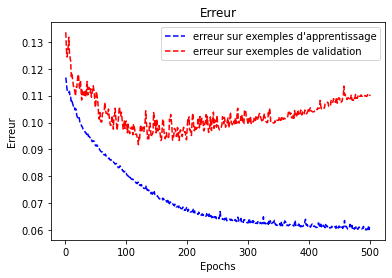

In [9]:
import matplotlib.pyplot as plt

loss = history_dict[eval_tests[0]]
val_loss = history_dict[eval_tests[2]]

epochs = range(1, len(loss) + 1)

# draw the loss evolution in blue
plt.plot(epochs, loss, 'b--', label='erreur sur exemples d\'apprentissage')
# draw the accuracy evolution in blue
plt.plot(epochs, val_loss, 'r--', label='erreur sur exemples de validation')
plt.title('Erreur')
plt.xlabel('Epochs')
plt.ylabel('Erreur')
plt.legend()

plt.show()

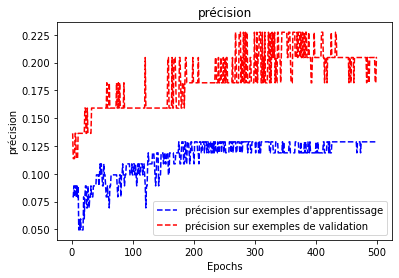

In [10]:
acc = history_dict[eval_tests[1]]
val_acc = history_dict[eval_tests[3]]

epochs = range(1, len(loss) + 1)

# draw the loss evolution in blue
plt.plot(epochs, acc, 'b--', label='précision sur exemples d\'apprentissage')
# draw the accuracy evolution in blue
plt.plot(epochs, val_acc, 'r--', label='précision sur exemples de validation')
plt.title('précision')
plt.xlabel('Epochs')
plt.ylabel('précision')
plt.legend()

plt.show()

---
## Utilisation du réseau
Déterminez la probabilité de réussite :
 1. d'une femme de 25 ans, étudiant à plein temps dans une université, n'ayant pas d'emploi, et membre d'un groupe de musique, en couple dans une location, se rendant aux cours en bus, dont les parents se sont arrêtés au lycée, ayant 1 frère, qui assiste aux 20h de cours hebdomadaires, qui révise seule et à la dernière minute, mais qui prend des notes et écoute en classe ?
 2. de votre cas personnel ?
 
- Quel est l'impact du niveau d'étude des parents sur la réussite d'une personne ?

- Quel est l'impact de l'écoute et de la prise de notes ?

In [11]:
girl = np.array([2, 2, 2, 5, 2, 1, 1, 1, 1, 3, 3, 1, 1, 5, 3, 1, 2, 2, 3, 3], float)
#girl = np.array([1, 2, 2, 4, 2, 1, 1, 1, 1, 4, 3, 1, 2, 2, 2, 1, 1, 1, 2, 2], float)
girl_normalisee = girl/maxis[:nb_val]

In [12]:
girl_prediction = model.predict(np.array([girl_normalisee]))

In [13]:
print(girl_prediction*maxis[nb_val])

[[4.7613173]]
